In [2]:
import json

In [3]:
cd drive/MyDrive/ANLP SemEval Task 2/Assignment 4

/content/drive/MyDrive/ANLP SemEval Task 2/Assignment 4


In [4]:
with open("test_final.json") as f:
  results = json.load(f)

In [5]:
models = [
    # 'Pred_T5_Combined_0',
    # 'Pred_T5_Separate_0', <-- best
    'Pred_T5_Separate_2',
    # 'Pred_T5_Separate_5',
    # 'Pred_T5_Separate_7',
    # 'Pred_T5_Separate_10',
    'Pred_SciFive_0',
    'Pred_SciFive_2',
    # 'Pred_SciFive_5',
    # 'Pred_SciFive_7',
    'Pred_Extractive',
    'Pred_Truncated'
]

In [6]:
model_to_premise = {
    'Pred_T5_Combined_0': ['Combined_Primary_premise_0'],

    'Pred_T5_Separate_0': ['Summarized_Primary_premise_0', 'Summarized_Secondary_premise_0'],
    'Pred_T5_Separate_2': ['Summarized_Primary_premise_2', 'Summarized_Secondary_premise_2'],
    'Pred_T5_Separate_5': ['Summarized_Primary_premise_5', 'Summarized_Secondary_premise_5'],
    'Pred_T5_Separate_7': ['Summarized_Primary_premise_7', 'Summarized_Secondary_premise_7'],
    'Pred_T5_Separate_10': ['Summarized_Primary_premise_10', 'Summarized_Secondary_premise_10'],

    'Pred_SciFive_0': ['Scifive_Primary_premise_0', 'Scifive_Seconday_premise_0'],
    'Pred_SciFive_2': ['Scifive_Primary_premise_2', 'Scifive_Seconday_premise_2'],
    'Pred_SciFive_5': ['Scifive_Primary_premise_5', 'Scifive_Seconday_premise_5'],
    'Pred_SciFive_7': ['Scifive_Primary_premise_7', 'Scifive_Seconday_premise_7'],

    'Pred_Extractive': ['Extractive_Primary_premise'],
    'Pred_Truncated': ['Primary_premise', 'Secondary_premise']
}

In [10]:
heatmap = {}
model = 'Pred_T5_Separate_0'
for mod in models:
  print("="*10)
  print("Model A:", model)
  print("Model B:", mod)
  agreements = 0
  for data in results:
    label = results[data]['Label']
    A_res = results[data][model]
    B_res = results[data][mod]
    if A_res != label and B_res != label:
      print("Combined Premises:")
      prem_names = model_to_premise[mod]

      print("Statement:")
      print(results[data]['Statement'])

      print("Model A Prediction:")
      print(A_res)

      print("Model B Prediction:")
      print(B_res)

      print("True Label:")
      print(label)
      break

Model A: Pred_T5_Separate_0
Model B: Pred_T5_Separate_2
Combined Premises:
Statement:
There are no conditions on mental mental health, bodyweight, size of tumours, Karnofsky/ECOG score or Estimated life expectancy that need to be met in order to be eligible for the primary trial 
Model A Prediction:
Contradiction
Model B Prediction:
Contradiction
True Label:
Entailment
Model A: Pred_T5_Separate_0
Model B: Pred_SciFive_0
Combined Premises:
Statement:
There are no conditions on mental mental health, bodyweight, size of tumours, Karnofsky/ECOG score or Estimated life expectancy that need to be met in order to be eligible for the primary trial 
Model A Prediction:
Contradiction
Model B Prediction:
Contradiction
True Label:
Entailment
Model A: Pred_T5_Separate_0
Model B: Pred_SciFive_2
Combined Premises:
Statement:
there are several different instances of cardiac related AE recorded for cohort 1 of the primary trial
Model A Prediction:
Contradiction
Model B Prediction:
Contradiction
True La

In [11]:
heatmap

{'Pred_T5_Combined_0': {'Pred_T5_Combined_0': 1.0,
  'Pred_T5_Separate_0': 0.72,
  'Pred_T5_Separate_2': 0.708,
  'Pred_T5_Separate_5': 0.688,
  'Pred_T5_Separate_7': 0.532,
  'Pred_T5_Separate_10': 0.666,
  'Pred_SciFive_0': 0.486,
  'Pred_SciFive_2': 0.674,
  'Pred_SciFive_5': 0.648,
  'Pred_SciFive_7': 0.672,
  'Pred_Extractive': 0.588,
  'Pred_Truncated': 0.604},
 'Pred_T5_Separate_0': {'Pred_T5_Combined_0': 0.72,
  'Pred_T5_Separate_0': 1.0,
  'Pred_T5_Separate_2': 0.728,
  'Pred_T5_Separate_5': 0.656,
  'Pred_T5_Separate_7': 0.536,
  'Pred_T5_Separate_10': 0.718,
  'Pred_SciFive_0': 0.59,
  'Pred_SciFive_2': 0.686,
  'Pred_SciFive_5': 0.716,
  'Pred_SciFive_7': 0.668,
  'Pred_Extractive': 0.66,
  'Pred_Truncated': 0.712},
 'Pred_T5_Separate_2': {'Pred_T5_Combined_0': 0.708,
  'Pred_T5_Separate_0': 0.728,
  'Pred_T5_Separate_2': 1.0,
  'Pred_T5_Separate_5': 0.66,
  'Pred_T5_Separate_7': 0.536,
  'Pred_T5_Separate_10': 0.67,
  'Pred_SciFive_0': 0.522,
  'Pred_SciFive_2': 0.674,
  '

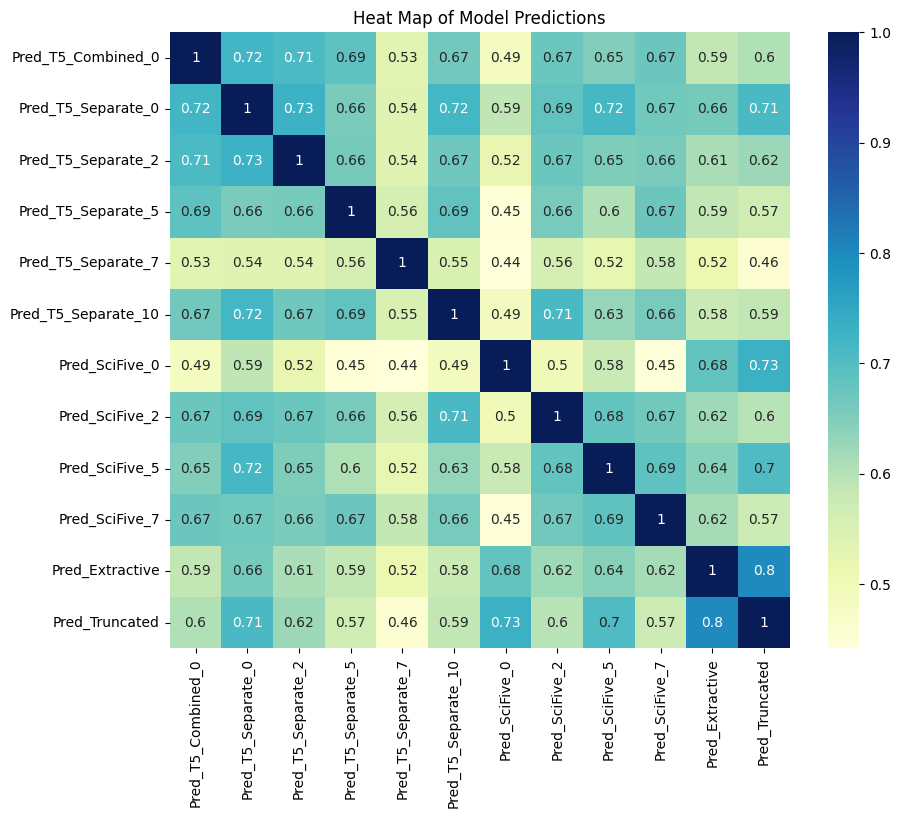

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(heatmap)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap="YlGnBu")
plt.title('Heat Map of Model Predictions')
plt.show()